In [1]:
import torch
from medcam import medcam
from monai import transforms
import numpy as np
import nibabel as nib
from model import VoxResNet

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VoxResNet().to(device)
model = medcam.inject(model, output_dir='attention_maps', backend='gcam', save_maps=False, return_attention=True)

In [5]:
transform = transforms.Compose([
    transforms.Resize(spatial_size=[110, 110, 110]),
    transforms.NormalizeIntensity(nonzero=True, channel_wise=True),
])

In [25]:
img_path = r"C:\Custom\DataSet\ADNI_预处理后\Image\brain_adni_0021_I196077_fsld.nii.gz"
nii_img = nib.load(img_path).get_fdata()
nii_img = nii_img.astype(np.float32)
original_img = nii_img
nii_img = torch.from_numpy(nii_img)
nii_img = nii_img.unsqueeze(0)
nii_img = transform(nii_img)
nii_img = nii_img.unsqueeze(0)
nii_img = nii_img.as_tensor()
print(nii_img.shape)

torch.Size([1, 1, 110, 110, 110])


In [13]:
model.eval()
with torch.no_grad():
    # 进行预测
    outputs, attention_map = model(nii_img)
    # 输出处理，获取预测结果
    _, predicted = torch.max(outputs, 1)
    attention_map = attention_map.detach().cpu().numpy()
attention_map = np.squeeze(attention_map)
print('predicted:', predicted)
print('attention_map shape:', attention_map.shape)

predicted: tensor([1])
attention_map shape: (110, 110, 110)


In [24]:
import matplotlib.pyplot as plt
plt.imsave('./attention_maps/test.jpg', attention_map[40], cmap="jet")

(91, 109)


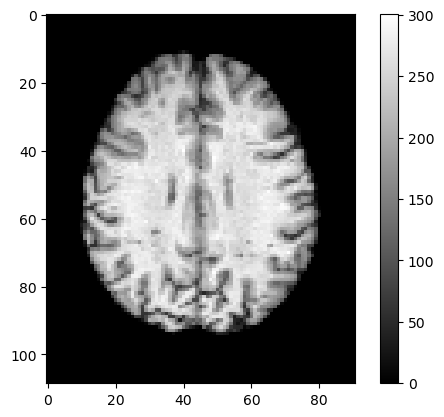

In [59]:
slice_idx = 50
print(original_img[:,:,slice_idx].shape)
plt.imshow(np.flipud(original_img[:,:,slice_idx].T), cmap='gray')
plt.colorbar()
plt.show()

In [60]:
attention_map[50][50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)